In [10]:
import openslide as op
from PIL import Image
import glob
from pathlib import Path
import os
import matplotlib.pyplot as plt
import czifile
from skimage.transform import resize
import numpy as np

In [11]:
slides_root = Path("/media/nathan/LaCie/M148_RH/")
masks_root = Path("/media/nathan/KINGSTON/BrainMapping/filled_masks_148/")

In [12]:
slides = glob.glob(str(slides_root / "*.czi"))

In [13]:
slides

['/media/nathan/LaCie/M148_RH/M148 LHRH344.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH350.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH352.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH354.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH356.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH358.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH360.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH362.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH364.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH366.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH368.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH370.czi',
 '/media/nathan/LaCie/M148_RH/M148-LHRH322.czi',
 '/media/nathan/LaCie/M148_RH/M148-LHRH334.czi',
 '/media/nathan/LaCie/M148_RH/M148-LHRH338.czi',
 '/media/nathan/LaCie/M148_RH/M148-LHRH342.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH004.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH008.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH012.czi',
 '/media/nathan/LaCie/M148_RH/M148 LHRH016.czi',
 '/media/nathan/LaCi

In [14]:
os.listdir(masks_root)

['M148 LHRH110seg',
 'M148 LHRH092seg',
 'M148 LHRH094seg',
 'M148 LHRH096seg',
 'M148 LHRH098seg',
 'M148 LHRH100seg',
 'M148 LHRH102seg',
 'M148 LHRH104seg',
 'M148 LHRH106seg',
 'M148 LHRH108seg']

In [15]:
def get_mask_area(slidepath, masks_root, area="whitematter"):
    stem = Path(slidepath).stem
    fp = masks_root / (stem + 'seg') / (area + ".png")
    if fp.exists():
        return fp
    return None

In [16]:
sp = '/media/nathan/LaCie/M148_RH/M148 LHRH096.czi'

In [17]:
wm = get_mask_area(sp, masks_root)

In [18]:
wm_img = Image.open(wm)

In [19]:
import aicspylibczi

In [20]:
ls = aicspylibczi.CziFile(sp)

In [28]:
ls.size

(1, 1, 721, 1203, 1603, 3)

In [31]:
bb = ls.get_mosaic_bounding_box()

In [34]:
bb.w, bb.h, bb.x, bb.y

(52183, 30386, 0, 0)

(156, 93, 3)


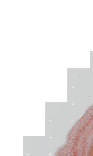

In [39]:
image = ls.read_mosaic((0, 0, 6000, 10000), C=0, scale_factor=1/64)
image = image.reshape(image.shape[-3:])
print(image.shape)
image = Image.fromarray(image)
image

In [90]:
image = ls.read_mosaic(C = 0, scale_factor=1/64)
image = image.reshape(image.shape[-3:])
image = Image.fromarray(image)

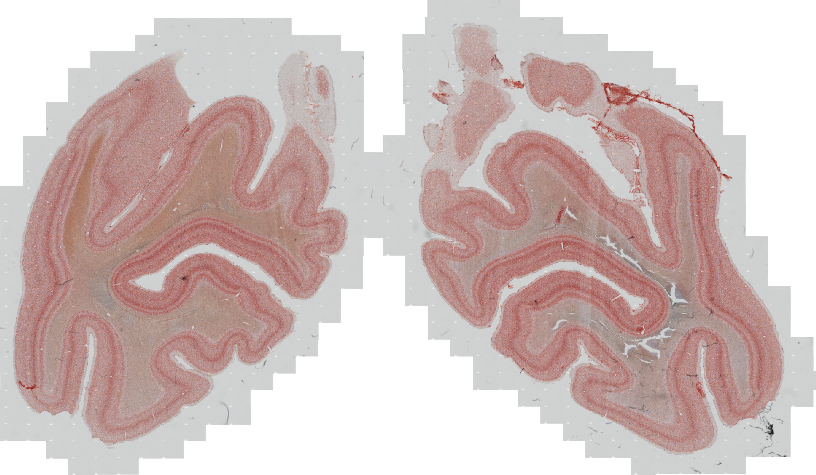

In [91]:
image

In [111]:
def superpose(image, mask):
    image = np.asarray(image)
    mask = np.asarray(mask)[:, :, :3]
    
    scale_size = 64
    scale_mask = 12
    mpp = 0.88
    conversion_factor = scale_size / scale_mask * mpp
    
    
    mask = resize(mask, div_img_shape(mask, conversion_factor))
    mask = (1 - np.round(mask)).astype(int).astype(np.uint8)
    
    mid_size = (
        int(mask.shape[0] / 2) - int(image.shape[0] / 2),
        int(mask.shape[1] / 2) - int(image.shape[1] / 2)
    )
    print(mid_size)
    print(conversion_factor)
    print(image.shape, mask.shape)
    
    mask = mask[mid_size[0]:mid_size[0]+image.shape[0], mid_size[1]:mid_size[1]+image.shape[1]]
    image *= mask
    return Image.fromarray(image)

(295, 124)
4.693333333333333
(475, 816, 3) (1065, 1065, 3)


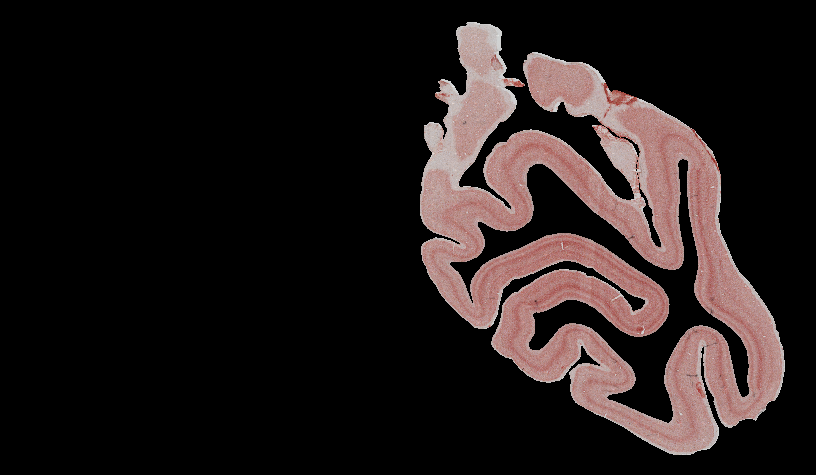

In [112]:
superpose(image, wm_img)

In [ ]:
def get_patches_from_image(image, step=224):
    sx, sy = image.shape[0], image.shape[1]
    ls_origins = []
    for i in range(0, sx, 224):
        for j in range(0, sy, 224):
            ls_origins.append((i, j))
    return ls_origins

In [161]:
np.unique(b), np.unique(wm_img)

(array([0], dtype=uint8), array([  0, 255], dtype=uint8))

In [182]:
mask = np.asarray(wm_img)

In [183]:
mask.shape

(5000, 5000, 4)

In [186]:
x = resize(mask, div_img_shape(mask, 9.386666666666667))
print(np.unique(x))
y = np.round(x).astype(int)
print(np.unique(y))
z = y.astype(np.uint8)
print(np.unique(z))

[0.00000000e+00 6.68353084e-12 7.09213098e-12 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[0 1]
[0 1]


In [185]:
np.unique(np.round(x))

array([0., 1.])

In [172]:
np.unique(z*200)

array([  0, 200], dtype=uint8)

In [153]:
mask.shape

(1250, 1250, 4)

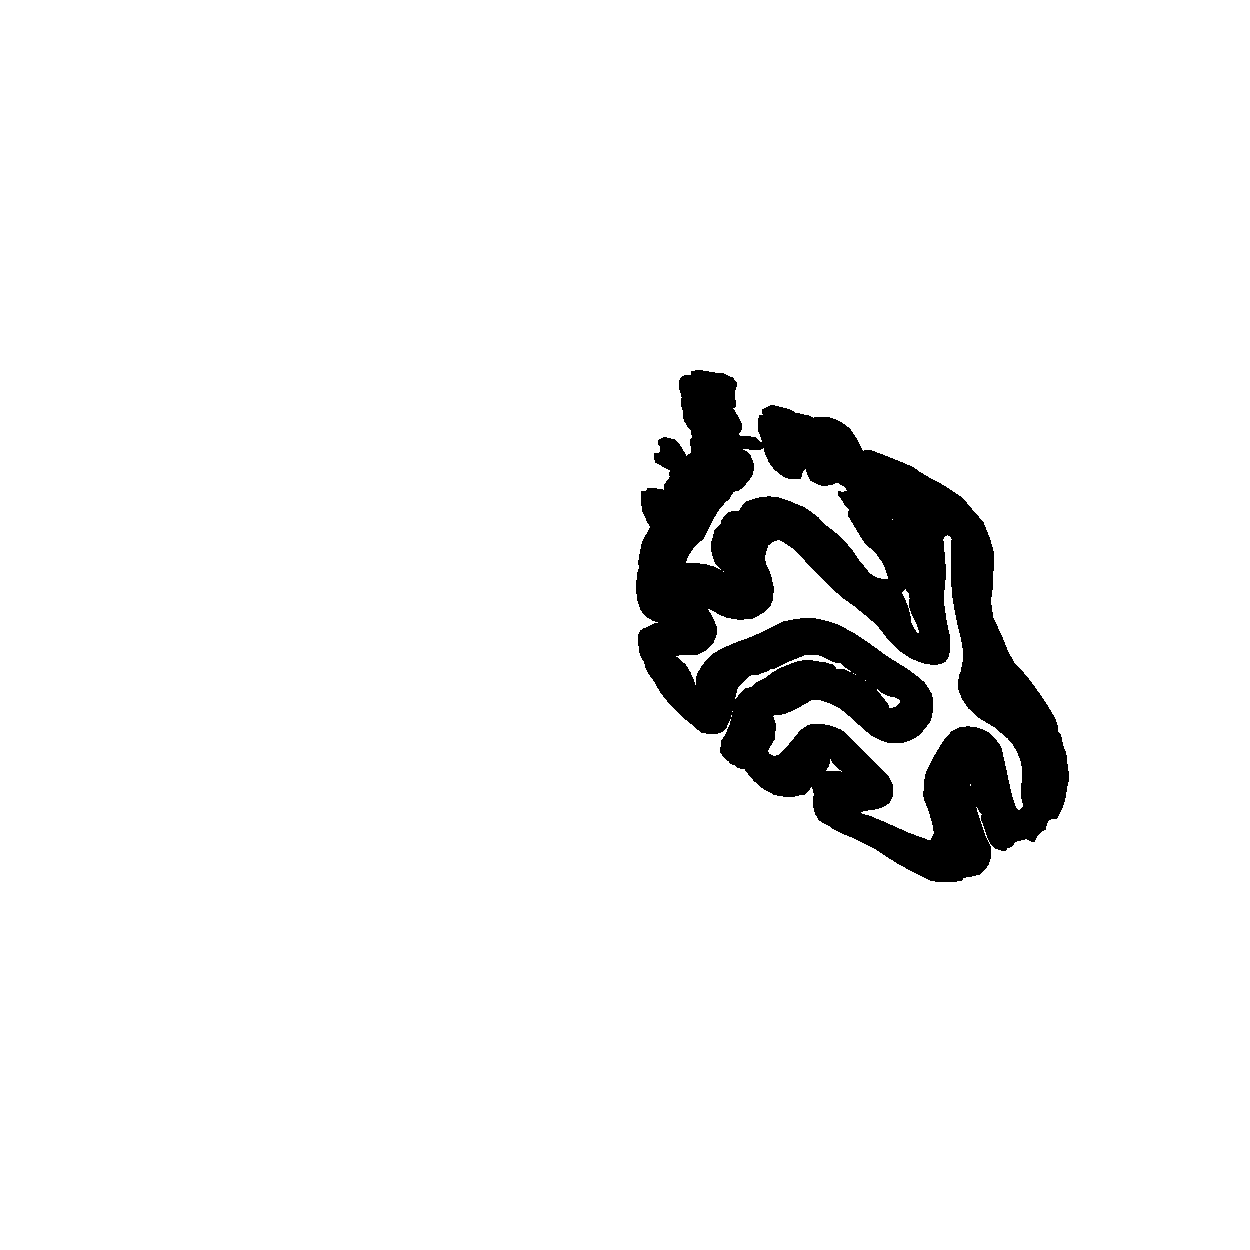

In [155]:
Image.fromarray(mask)

In [142]:
image = np.asarray(image)
scale_size = 128
scale_mask = 12
mpp = 0.88
mid_size = (
    int(image.shape[0] / 2 * scale_size / scale_mask * mpp),
    int(image.shape[1] / 2 * scale_size / scale_mask * mpp)
)
mid_size

(1112, 1914)

In [154]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [19]:
def czi_to_arr(czi):
    arr = czi.asarray()
    shape = arr.shape[-3:]
    arr = arr.reshape(shape)
    return arr

In [88]:
def div_img_shape(img, factor):
    shape = img.shape
    return (int(shape[0] / factor), int(shape[1] / factor), *shape[2:])

In [13]:
arr = czi_to_arr(sl)

In [14]:
arr.shape

(42273, 49150, 3)

In [25]:
div_img_shape(arr, 4)

(10568, 12287, 3)

In [ ]:
def _patch_based_generation(coord, downscale, size):
    margin_arr = np.zeros(size)
    

In [26]:
out = resize(arr, div_img_shape(arr, 16))

MemoryError: Unable to allocate 46.4 GiB for an array with shape (42273, 49150, 3) and data type float64

In [68]:
def _patch_based_generation(arr, coord, downscale, size):
    end_img = np.zeros(size + (3,))
    patch_down_size = 64
    patch_up_size = int(patch_down_size / downscale)

    for i in range(0, size[0], patch_up_size):
        for j in range(0, size[1], patch_up_size):
            img = np.zeros((patch_up_size, patch_up_size, 3))
            
            img_down = arr[coord[0] + downscale * i:coord[0] + downscale * i + patch_down_size,
                           coord[1] + downscale * j:coord[1] + downscale * j + patch_down_size]
            
            resized_down = resize(img_down, (int(img_down.shape[0] / downscale),
                                             int(img_down.shape[1] / downscale),
                                             3))
            
            end_img[i:min(i+patch_up_size, size[0]), j:min(j+patch_up_size, size[1])] = \
                resized_down

    return end_img.astype(np.uint8)

In [69]:
arr.shape

(42273, 49150, 3)

In [74]:
img = _patch_based_generation(arr, (0, 0), 64, (512, 512))

KeyboardInterrupt: 

In [ ]:
Image.fromarray(img)

# Provider

In [2]:
import glob
from pathlib import Path
import aicspylibczi
from skimage.transform import resize

from brainseg.provider import DataHandler, provider

In [172]:
def get_mask_from_slidepath(slidepath, masks_root, area="whitematter"):
    stem = Path(slidepath).stem
    fp = masks_root / (stem + 'seg') / (area + ".png")
    if fp.exists():
        return fp
    return None


def open_image(slide, origine, downscale, size):
    scale = 1 / downscale
    bbox = slide.get_mosaic_bounding_box()
    max_size_fit = bbox.w, bbox.h
    arr = np.zeros((size, size, 3))
    size_down = int(size * downscale)
    size_fit = (
        max(min(max_size_fit[0], origine[0] + size_down) - origine[0], 0),
        max(min(max_size_fit[1], origine[1] + size_down) - origine[1], 0),
    )
    image = ls.read_mosaic((origine[0], origine[1], size_fit[0], size_fit[1]), C=0, scale_factor=scale)
    image = image.reshape(image.shape[-3:])
    arr[:image.shape[0], :image.shape[1]] = image
    
    return arr

def patch_from_mask(slide, mask, origine, downscale, size, background=255):
    bbox = slide.get_mosaic_bounding_box()
    # here it's reversed
    slide_size = bbox.h, bbox.w
    mask = np.asarray(mask)[:, :, :3]
    
    scale_mask = 12  # shall stay identical for all
    mpp = 0.88
    # from the mask to the downscaled image ?
    conversion_factor_target = downscale / scale_mask * mpp
    conversion_factor_bottom = 1 / scale_mask * mpp
    
    mid_size = (
        int(mask.shape[0] / 2) - int(slide_size[0] / 2 * conversion_factor_bottom),
        int(mask.shape[1] / 2) - int(slide_size[1] / 2 * conversion_factor_bottom)
    )
    
    cut_mask = mask[mid_size[0]:-mid_size[0], mid_size[1]:-mid_size[1]]
    
    scaled_origine = int(origine[0] * conversion_factor_bottom), int(origine[1] * conversion_factor_bottom)
    scaled_size = int(size * conversion_factor_target)
    
    # here it's reversed
    sub_mask = cut_mask[scaled_origine[1]:scaled_origine[1] + scaled_size,
                        scaled_origine[0]:scaled_origine[0] + scaled_size]
    
    complete_sub_mask = np.zeros((scaled_size, scaled_size, 3), dtype=np.uint8)
    complete_sub_mask.fill(background)
    complete_sub_mask[:sub_mask.shape[0], :sub_mask.shape[1]] = sub_mask
    
    
    final_mask = resize(complete_sub_mask, (size, size))
    
    return np.round(final_mask).astype(int).astype(np.uint8)

In [125]:
class SlideHandler(DataHandler):
    def __init__(self, slides_root, masks_root, area="whitematter"):
        self.slides_root = Path(slides_root)
        self.masks_root = Path(masks_root)
        self.name = area
        self.area = area
        
        self.slides = glob.glob(str(self.slides_root / "*.czi"))
        self.cache = dict()
        
    def get_slide(self, slidepath):
        fullpath = self.slides_root / slidepath
        if slidepath not in self.cache:
            self.cache[slidepath] = aicspylibczi.CziFile(fullpath)
            
        return self.cache[slidepath]
        
    def load_image(self, element):
        assert isinstance(element, dict), "Element is not a dict !"
        assert all([k in element for k in ["slidepath", "downscale", "ori_x", "ori_y", "size"]])
        
        slide = self.get_slide(element["slidepath"])
        
        # handle size conflicts
        return open_image(slide, (element["ori_x"], element["ori_y"]), element["downscale"], element["size"])
    
    def load_mask(self, element):
        assert isinstance(element, dict), "Element is not a dict !"
        assert all([k in element for k in ["slidepath", "downscale", "ori_x", "ori_y", "size"]])
        
        slide = self.get_slide(element["slidepath"])
        
        maskpath = get_mask_from_slidepath(element["slidepath"], self.masks_root, area=self.area)
        mask = Image.open(maskpath)
        mask = np.asarray(mask)[:, :, :3]
        
        return patch_from_mask(slide, mask,
                               (element["ori_x"], element["ori_y"]),
                               element["downscale"], element["size"])

In [103]:
sh = SlideHandler("/media/nathan/LaCie/M148_RH/", "/media/nathan/KINGSTON/BrainMapping/filled_masks_148/")

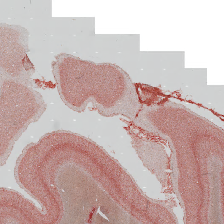

In [175]:
el = dict(
    slidepath="M148 LHRH096.czi",
    ori_x=30000,  # 40000
    ori_y=0,
    downscale=64,
    size=224,
)

arr = sh.load_image(el)

Image.fromarray(arr.astype(np.uint8))

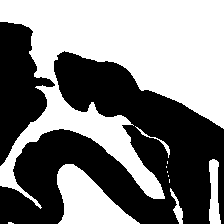

In [176]:
el = dict(
    slidepath="M148 LHRH096.czi",
    ori_x=30000,
    ori_y=0,
    downscale=64,
    size=224,
)

arr = sh.load_mask(el)

Image.fromarray(arr * 255)